In [1]:
#고객이탈데이터셋 불러오기
import pandas as pd

df = pd.read_csv('c:/data/customer/customer.csv')

In [2]:
df.columns

Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn'],
      dtype='object')

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


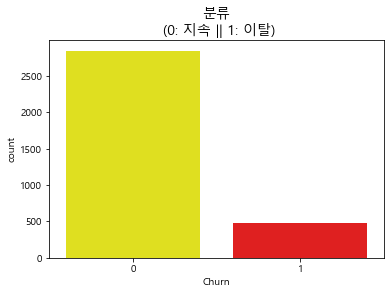

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

#한글처리
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

colors = ['yellow', 'red']
sns.countplot('Churn', data=df, palette=colors)
plt.title('분류\n (0: 지속 || 1: 이탈)', fontsize=14)
plt.show()

In [4]:
train_cols = df.columns[:16]

X = df[train_cols]
y = df['Churn']

array([[<AxesSubplot:xlabel="Int'l Plan", ylabel="Int'l Plan">,
        <AxesSubplot:xlabel='VMail Plan', ylabel="Int'l Plan">,
        <AxesSubplot:xlabel='VMail Message', ylabel="Int'l Plan">,
        <AxesSubplot:xlabel='Day Mins', ylabel="Int'l Plan">,
        <AxesSubplot:xlabel='Day Calls', ylabel="Int'l Plan">,
        <AxesSubplot:xlabel='Day Charge', ylabel="Int'l Plan">,
        <AxesSubplot:xlabel='Eve Mins', ylabel="Int'l Plan">,
        <AxesSubplot:xlabel='Eve Calls', ylabel="Int'l Plan">,
        <AxesSubplot:xlabel='Eve Charge', ylabel="Int'l Plan">,
        <AxesSubplot:xlabel='Night Mins', ylabel="Int'l Plan">,
        <AxesSubplot:xlabel='Night Calls', ylabel="Int'l Plan">,
        <AxesSubplot:xlabel='Night Charge', ylabel="Int'l Plan">,
        <AxesSubplot:xlabel='Intl Mins', ylabel="Int'l Plan">,
        <AxesSubplot:xlabel='Intl Calls', ylabel="Int'l Plan">,
        <AxesSubplot:xlabel='Intl Charge', ylabel="Int'l Plan">,
        <AxesSubplot:xlabel='CustServ Ca

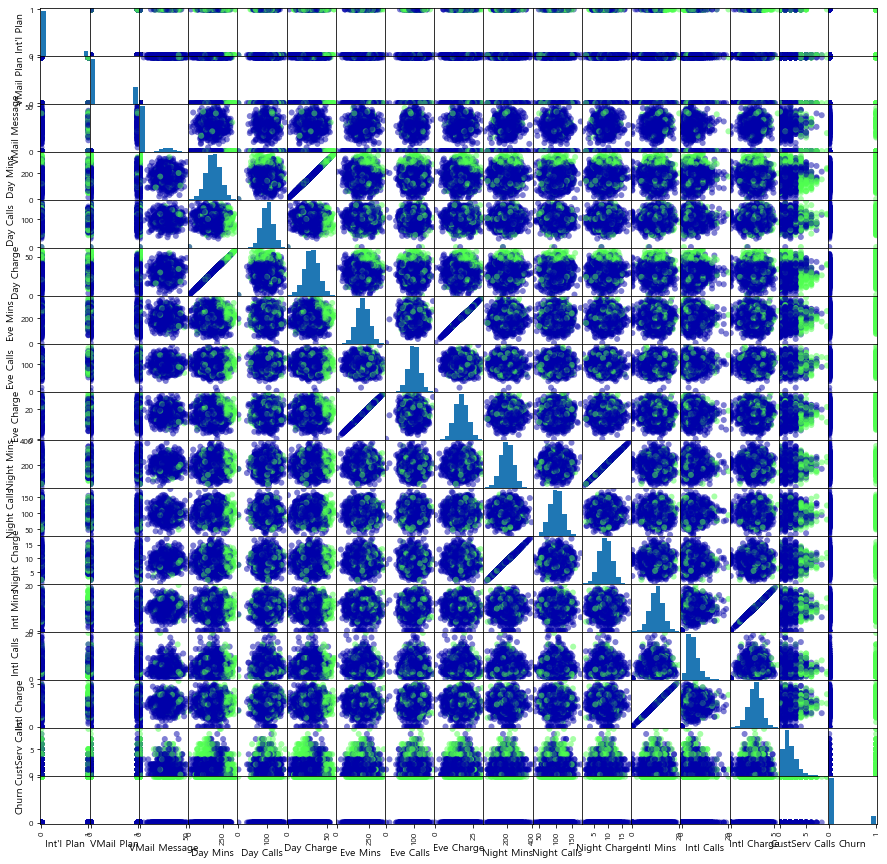

In [5]:
import mglearn
pd.plotting.scatter_matrix(df, c=y, figsize=(15,15), marker='o', cmap=mglearn.cm3)

In [6]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Churn'])
df_samp = pd.concat([X_samp, y_samp], axis=1)

In [7]:
df_samp['Churn'].value_counts()

0    483
1    483
Name: Churn, dtype: int64

In [8]:
train_cols = df_samp.columns[:16]
X = df_samp[train_cols]
y = df_samp['Churn']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=10)

In [10]:
from tensorflow.keras import Sequential
from keras.layers.core import Dense

class MyModel(Sequential):
    def __init__(self, input_nodes, hidden_layers, num_classes):
        super(MyModel, self).__init__(name='my_model')
        self.num_classes = num_classes
        self.add(Dense(hidden_layers[0], input_shape=(input_nodes,), activation='relu'))
        self.add(Dense(hidden_layers[1], activation='relu'))
        self.add(Dense(hidden_layers[2], activation='relu'))
        self.add(Dense(num_classes, activation='sigmoid'))

model = MyModel(len(X_train.columns), [128,64,32],1)
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

<AxesSubplot:>

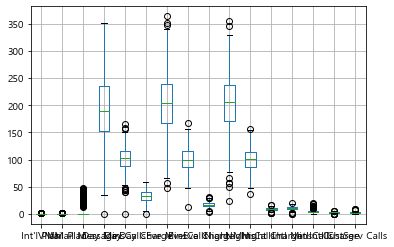

In [11]:
X_train.boxplot()

<AxesSubplot:>

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


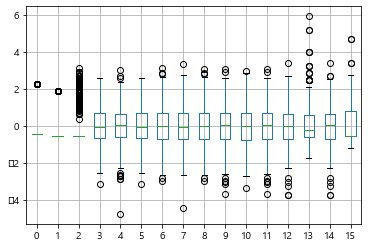

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

X_train_scaled.boxplot()

In [13]:
#모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.2247 - accuracy: 0.6524
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.8003
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1408 - accuracy: 0.8299
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1193 - accuracy: 0.8432
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1080 - accuracy: 0.8683
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.8757
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0955 - accuracy: 0.8787
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.8935
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0872 - accuracy: 0.8950
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0829 - accuracy: 0.9053
Epoch 11/

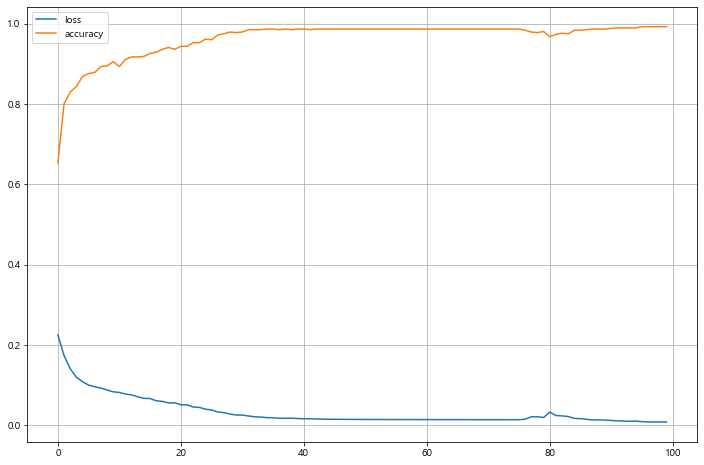

In [17]:
#모델의 학습과정
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실률
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss', 'accuracy'])
plt.grid()
plt.show()

In [23]:
#모델 평가
scores = model.evaluate(X_train_scaled, y_train, verbose=1)
print('%s(학습용): %.2f%%' %(model.metrics_names[1], scores[1]*100))

scores = model.evaluate(X_test_scaled, y_test, verbose=1)
print('%s(검증용):%.2f%%' % (model.metrics_names[1], scores[1]*100))

22/22 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 0.9926
accuracy(학습용): 99.26%
10/10 [==============================] - 0s 3ms/step - loss: 0.1503 - accuracy: 0.8207
accuracy(검증용):82.07%


In [24]:
#새로운 데이터에 대한 분류
pred = model.predict(X_test_scaled)
print(pred[0])
y_pred=[]
for pr in pred:
    if pr >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print(y_pred)

[0.00150584]
[0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0]


In [29]:
#오분류표
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[113  32]
 [ 20 125]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       145
           1       0.80      0.86      0.83       145

    accuracy                           0.82       290
   macro avg       0.82      0.82      0.82       290
weighted avg       0.82      0.82      0.82       290

